In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import urllib
%matplotlib inline


In [3]:
#Import DATA 
raw_data = pd.read_csv('D:\DATA_tests\FuelConsumptionCO2.csv', encoding='cp1252', sep=',')
df = pd.DataFrame(raw_data)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


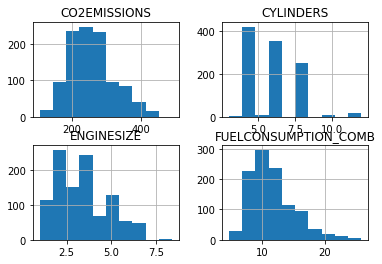

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()


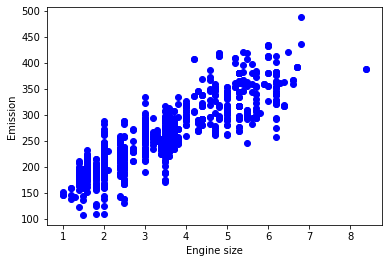

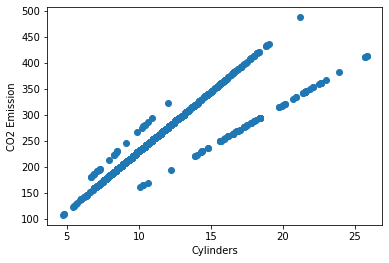

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emission')
plt.show()

858
209


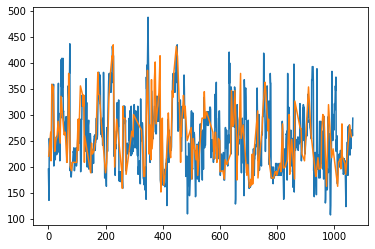

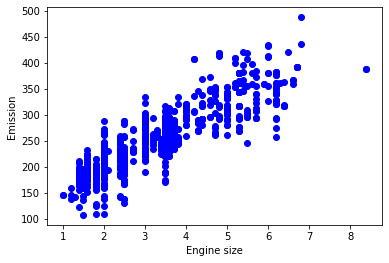

In [10]:
#Creationg Train and Test datasets
#Create a mask to select randon rows
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(len(train))
print(len(test))

plt.plot(train.CO2EMISSIONS)
plt.plot(test.CO2EMISSIONS)
plt.show()
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()




Coefficients:  [[38.90529522]]
Intercept:  [125.20946711]
Mean absolute error:  22.36
Residual sum of squares (MSE): 842.51
R2-score: 0.74


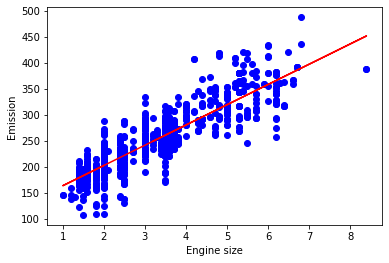

In [11]:
# Simple linear regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

#Plot
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#Evaluation
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: ", round(np.mean(np.absolute(test_y_hat - test_y)), 2))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )



In [12]:
# Multiple Regression
regr = linear_model.LinearRegression()
#test_x = np.array([train.ENGINESIZE, train.CYLINDERS])

test_x=train[['ENGINESIZE','CYLINDERS']]
test_y = np.asanyarray(train.CO2EMISSIONS)
#y = np.dot(test_x, test_y))
regr.fit (test_x, test_y)
# The coefficients
print(regr.coef_)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

#Evaluation
test_y_hat = regr.predict(test_x)

print("Mean absolute error: ", round(np.mean(np.absolute(test_y_hat - test_y)), 2))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y), '(Explained variance score: 1 is perfect prediction)')

[26.68678352 10.26372299]
Coefficients:  [26.68678352 10.26372299]
Intercept:  106.58819255071299
Mean absolute error:  23.39
Residual sum of squares (MSE): 929.35
Variance score: 0.77 (Explained variance score: 1 is perfect prediction)


Coefficients:  [[ 0.         50.80208004 -1.57874179]]
Intercept:  [106.19888148]
Mean absolute error: 22.27
Residual sum of squares (MSE): 841.35
R2-score: 0.74


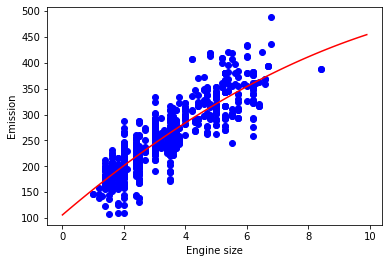

In [14]:
# Polynomial regression 𝑦=𝑏+𝜃1𝑥+𝜃2𝑥^2
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

#Plotting
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

#Evaluation
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
